# Thématique 5 - Analyse multivariée et analyse en composantes principales

### Importation des librairies

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data pre-processing

In [4]:
# File pre-processing
filepath = "../data"
filename = "EconomieEuropData.txt"
file = os.path.join(filepath, filename)

# Reading data
df_original = pd.read_csv(file, sep="\t")
df = df_original.copy()

# Data display
df.describe()

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-1.590000,10.600000,2.425000,34851.645000,1683.935000,23055.078000
std,3.443361,5.767331,1.233683,14203.934798,184.327427,25249.098479
min,-6.300000,4.400000,0.000000,19908.200000,1379.000000,487.940000
25%,-3.225000,7.375000,1.650000,25397.675000,1568.500000,5486.647500
50%,-1.950000,9.050000,2.600000,34971.550000,1664.000000,10498.150000
75%,-0.575000,11.675000,3.075000,39525.400000,1778.750000,39795.665000
max,9.800000,25.100000,5.200000,86269.400000,2032.000000,81212.000000


Cet ensemble de données présente des indicateurs économiques pour les pays européens. Il y a 20 pays dans ce jeu de données et pour chaque pays, ce jeu de données met en évidence certains indicateurs comme le PIB, le nombre de résidents, etc.

Le nombre moyen de résidents est de 23 055K personnes. Le plus petit pays compte 487 000 habitants et le plus grand 81 212 000 habitants.

In [5]:
df.head()

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population,ZoneEuro
Allemagne,-0.6,5.5,2.0,37430.1,1413.0,81212.00,Zone Euro
Autriche,1.2,4.4,2.5,40064.8,1599.7,8452.84,Zone Euro
Belgique,-3.2,7.6,2.8,37727.8,1577.0,11106.96,Zone Euro
Danemark,-0.7,7.5,3.3,40189.9,1522.0,5505.40,Pas Euro
Espagne,-6.0,25.1,2.8,31903.8,1690.0,44975.36,Zone Euro


In [6]:
df.tail()

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population,ZoneEuro
Portugal,-4.9,15.9,0.7,25444.3,1711.0,10704.19,Zone Euro
Slovaquie,9.8,14.0,3.6,23263.6,1793.0,5407.97,Zone Euro
République tchèque,-0.8,7.0,3.0,25257.8,1774.0,10292.11,Pas Euro
Royaume-Uni,-2.5,7.9,0.9,35686.8,1625.0,63209.45,Pas Euro
Suède,-2.1,8.0,3.6,39345.6,1644.0,9551.00,Pas Euro


In [7]:
df.shape

(20, 7)

Il y a 20 pays pour 7 variables.

In [8]:
df.dtypes

TCProd          float64
Tchomage        float64
TCPrix          float64
PIB             float64
DureeTravail    float64
Population      float64
ZoneEuro         object
dtype: object

Dans cette étude, à l'exception du continent sur lequel se situe le pays, nous ne disposons que de variables quantitatives.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Allemagne to Suède
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TCProd        20 non-null     float64
 1   Tchomage      20 non-null     float64
 2   TCPrix        20 non-null     float64
 3   PIB           20 non-null     float64
 4   DureeTravail  20 non-null     float64
 5   Population    20 non-null     float64
 6   ZoneEuro      20 non-null     object 
dtypes: float64(6), object(1)
memory usage: 1.2+ KB


In [10]:
df.columns

Index(['TCProd', 'Tchomage', 'TCPrix', 'PIB', 'DureeTravail', 'Population',
       'ZoneEuro'],
      dtype='object')

In [11]:
df.isnull().sum()

TCProd          0
Tchomage        0
TCPrix          0
PIB             0
DureeTravail    0
Population      0
ZoneEuro        0
dtype: int64

Il n'y a pas de données manquantes dans ce jeu de données.

In [12]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(), df[col].unique()))

TCPROD :[-0.6  1.2 -3.2 -0.7 -6.  -0.1 -2.1 -2.5 -3.3 -1.8 -1.3 -6.3 -5.3 -0.5
 -4.9  9.8 -0.8] 
TCHOMAGE :[ 5.5  4.4  7.6  7.5 25.1 10.1  7.7 10.2 24.3 10.9 14.7 10.7  5.1  5.3
 15.9 14.   7.   7.9  8. ] 
TCPRIX :[2.  2.5 2.8 3.3 2.4 3.9 1.5 5.2 1.7 0.  2.7 1.1 0.7 3.6 3.  0.9] 
PIB :[37430.1 40064.8 37727.8 40189.9 31903.8 20393.3 36307.  34256.3 28443.8
 20555.6 40478.1 31911.1 86269.4 42195.6 19908.2 25444.3 23263.6 25257.8
 35686.8 39345.6] 
DUREETRAVAIL :[1413.  1599.7 1577.  1522.  1690.  1924.  1684.  1476.  2032.  1980.
 1543.  1774.  1601.  1379.  1937.  1711.  1793.  1625.  1644. ] 
POPULATION :[81212.    8452.84 11106.96  5505.4  44975.36  1334.37  5430.39 63724.44
 11338.13  9979.67  4441.42 59100.81   487.94 16778.01 38069.1  10704.19
  5407.97 10292.11 63209.45  9551.  ] 
ZONEEURO :['Zone Euro' 'Pas Euro'] 


In [14]:
df

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population,ZoneEuro
Allemagne,-0.6,5.5,2.0,37430.1,1413.0,81212.00,Zone Euro
Autriche,1.2,4.4,2.5,40064.8,1599.7,8452.84,Zone Euro
Belgique,-3.2,7.6,2.8,37727.8,1577.0,11106.96,Zone Euro
Danemark,-0.7,7.5,3.3,40189.9,1522.0,5505.40,Pas Euro
Espagne,-6.0,25.1,2.8,31903.8,1690.0,44975.36,Zone Euro
Estonie,-0.1,10.1,2.4,20393.3,1924.0,1334.37,Pas Euro
Finlande,-2.1,7.7,3.9,36307.0,1684.0,5430.39,Zone Euro
France,-2.5,10.2,2.8,34256.3,1476.0,63724.44,Zone Euro
Grèce,-3.3,24.3,2.0,28443.8,2032.0,11338.13,Zone Euro
Hongrie,-1.8,10.9,1.5,20555.6,1980.0,9979.67,Pas Euro


## Analyse des données

### Centrage et réduction des données

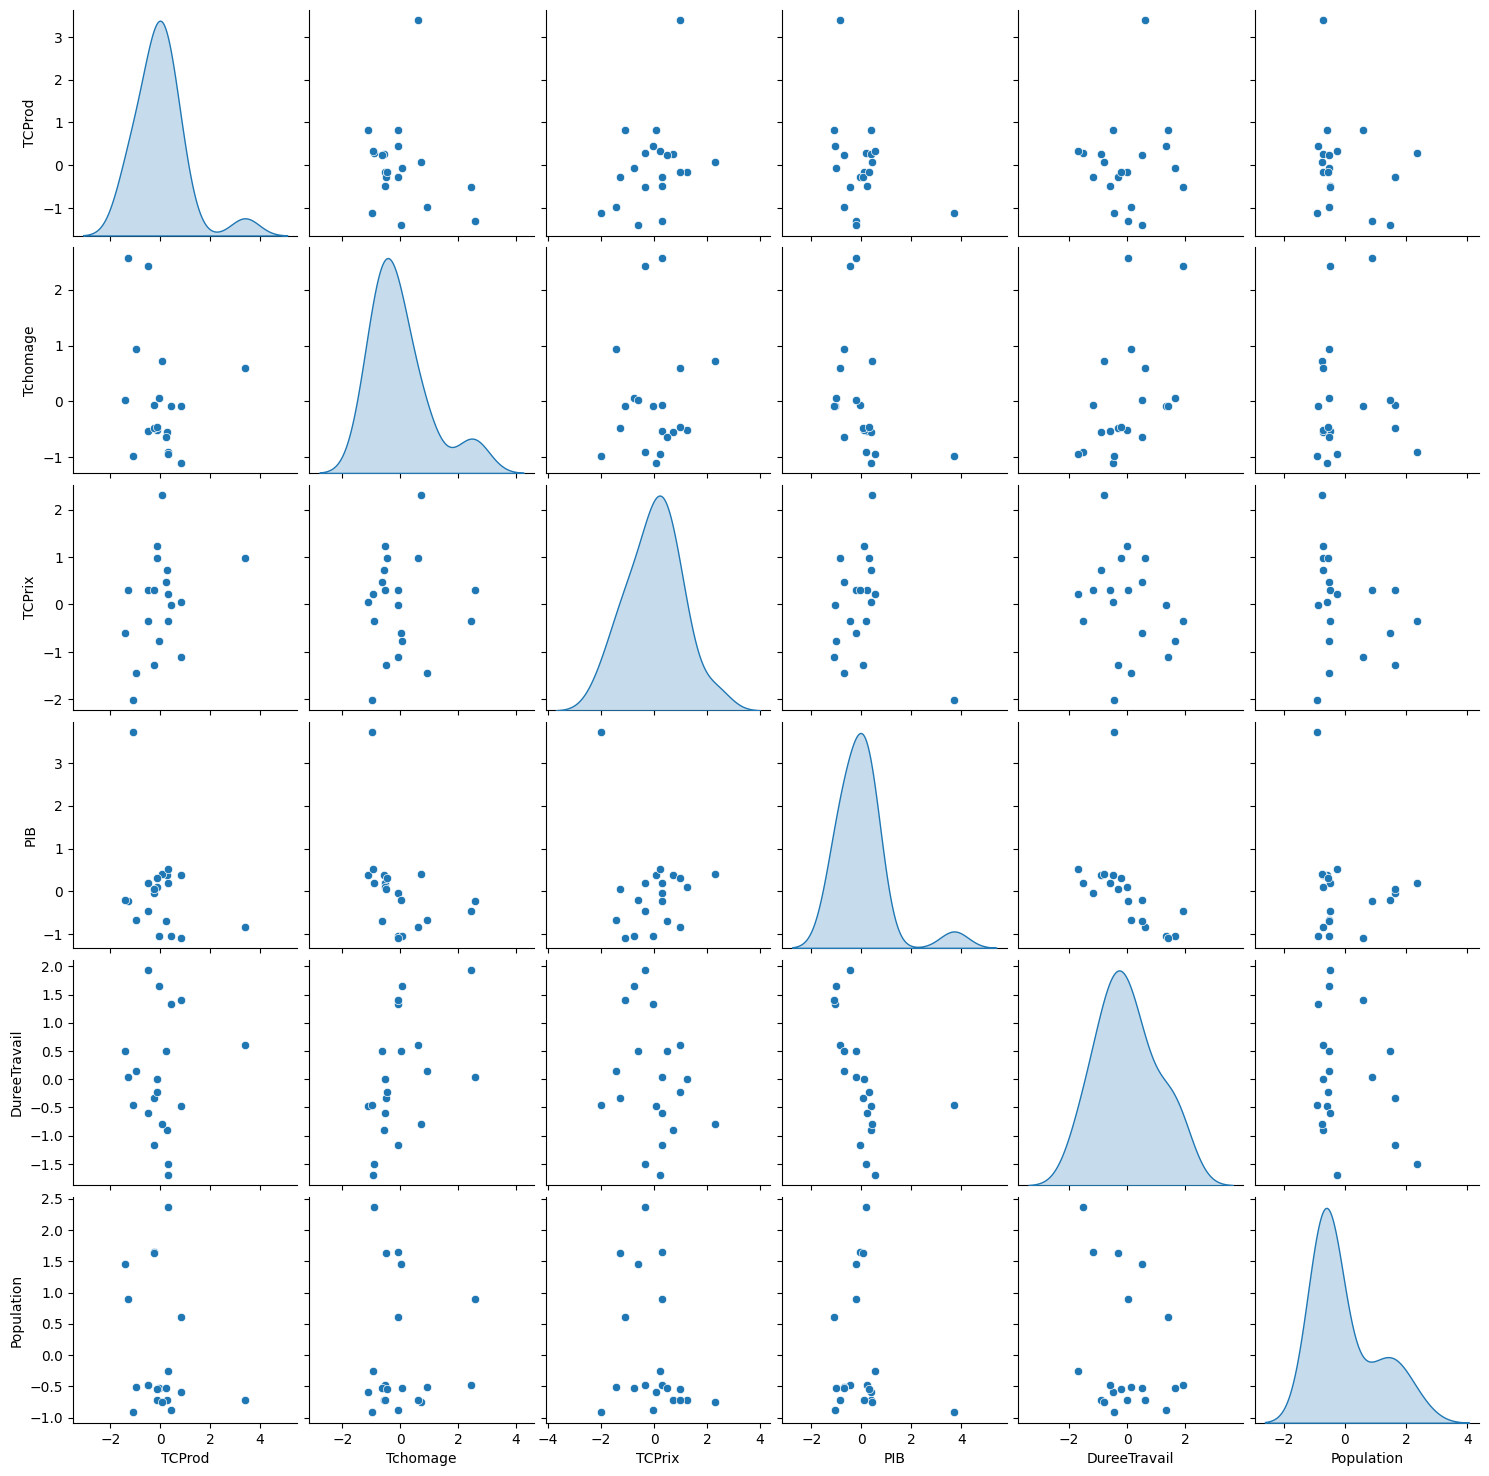

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

# Centering and reducting numeric data
variables_to_scale = df.select_dtypes(include=['float', 'int']).columns
df_scaled[variables_to_scale] = scaler.fit_transform(df[variables_to_scale])

# Create a pairplot with seaborn on scaled data
sns.pairplot(df_scaled, diag_kind="kde")

## Traitement des données

### ACP

In [20]:
from sklearn.decomposition import PCA

# Réaliser l'ACP
pca = PCA()
components = pca.fit_transform(df_scaled.select_dtypes(include=['float', 'int']))

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Eigen value
vp = pca.explained_variance_

data_vp = []
variance_sum = 0

for i in range(len(vp)):
    variance_sum += explained_variance[i]
    data_vp.append([f"Comp {i+1}", vp[i], explained_variance[i]*100, variance_sum*100])

# Créer un DataFrame pandas
df_vp = pd.DataFrame(data_vp, columns=["Comp", "Eigenvalue", "Percentage of Variance", "Cumulative Variance"])

# Afficher le tableau
print(df_vp)

     Comp  Eigenvalue  Percentage of Variance  Cumulative Variance
0  Comp 1    2.059921               32.615420            32.615420
1  Comp 2    1.662273               26.319320            58.934740
2  Comp 3    1.110405               17.581419            76.516159
3  Comp 4    0.951868               15.071241            91.587401
4  Comp 5    0.378720                5.996400            97.583801
5  Comp 6    0.152602                2.416199           100.000000


32,6% de la 1ère composante et 26,3% de la 2ème composante expliquent 58,9% de l'inertie totale. Si l'on regarde la valeur propre, il faut 3 composantes pour obtenir 70% de l'inertie totale.

### Eigen vector pie chart

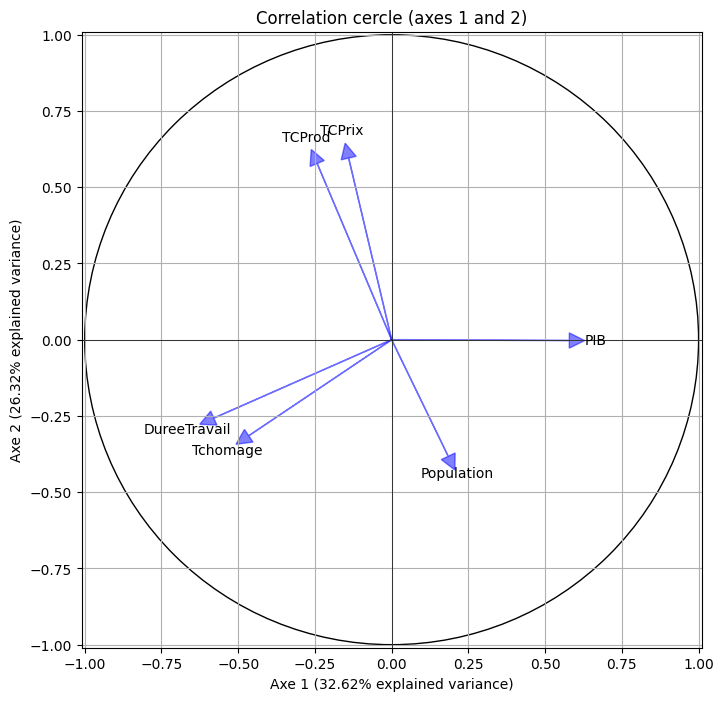

In [21]:
# Eigen vectors
components = pca.components_

# Plot
plt.figure(figsize=(8, 8))

# Pie chart
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_artist(circle)

# Abscissa and ordinate limits
plt.xlim(-1.01, 1.01)
plt.ylim(-1.01, 1.01)

# Drawing eigen vectors
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='b', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(x * 1.15, y * 1.15, df.columns[i], ha='center', va='center')

# Abscissa and ordinate labels
plt.xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}% explained variance)')
plt.ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}% explained variance)')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Correlation cercle (axes 1 and 2)")

# Plot display
plt.show()

**Rappel** :
- Les flèches proches du cercle indiquent que les variables sont bien représentées par les deux premières composantes principales.
- Les flèches perpendiculaires indiquent que les variables ne sont pas corrélées entre elles.
- Les flèches qui pointent dans la même direction indiquent une corrélation positive entre ces variables.
- Lorsque deux flèches pointent dans une direction similaire (proches l'une de l'autre), cela indique que les deux variables sont positivement corrélées.
- Si les flèches pointent dans des directions opposées (à environ 180 degrés l'une de l'autre), cela signifie que les deux variables sont fortement corrélées négativement. En d'autres termes, lorsque l'une des variables augmente, l'autre a tendance à diminuer.

**Explications** :
- TCProd et TCPrix sont positivement corrélés l'un à l'autre, comme DureeTravail et TChomage.
- TCProd et TCPrix sont négativement corrélés avec la population.
- Mais TCProd et TCPrix ne sont pas corrélés avec TCProd et TCPrix.

In [22]:
# Computing absolute contribution
contributions_abs = components**2

# Keep the 2-first contributions
contributions_pc1_pc2 = contributions_abs[:2, :]

# Computing relative contribution
contributions_pc1_relative = contributions_pc1_pc2[0] / contributions_pc1_pc2[0].sum() * 100
contributions_pc2_relative = contributions_pc1_pc2[1] / contributions_pc1_pc2[1].sum() * 100

# Creating a dataframe
df_contributions = pd.DataFrame({
    "Variable": variables_to_scale,
    "PC1 Relative Contribution (%)": contributions_pc1_relative,
    "PC2 Relative Contribution (%)": contributions_pc2_relative
})

print(df_contributions)

       Variable  PC1 Relative Contribution (%)  PC2 Relative Contribution (%)
0        TCProd                       5.887233                      33.386524
1      Tchomage                      21.685036                       9.916953
2        TCPrix                       1.960852                      35.485407
3           PIB                      33.498988                       0.000670
4  DureeTravail                      33.571420                       6.604204
5    Population                       3.396471                      14.606242


Le deuxième axe semble représenter le pouvoir d'achat et le premier, la richesse de la population.

In [23]:
# Creating a dataframe with cos²
cos2_df = pd.DataFrame(contributions_abs.T, index=variables_to_scale, columns=[f'Axe {i+1}' for i in range(components.shape[0])])

# cos² display
print("Cos² pour chaque variable sur les composantes principales :")
print(cos2_df*100)

Cos² pour chaque variable sur les composantes principales :
                  Axe 1      Axe 2      Axe 3      Axe 4      Axe 5      Axe 6
TCProd         5.887233  33.386524   3.513009  21.059358  36.152202   0.001673
Tchomage      21.685036   9.916953   0.016030  33.236900  31.359124   3.785957
TCPrix         1.960852  35.485407   3.522513  35.073413   5.682186  18.275629
PIB           33.498988   0.000670  20.060397   2.055058  23.227806  21.157081
DureeTravail  33.571420   6.604204   9.473064   8.293520   1.323665  40.734127
Population     3.396471  14.606242  63.414987   0.281750   2.255017  16.045532


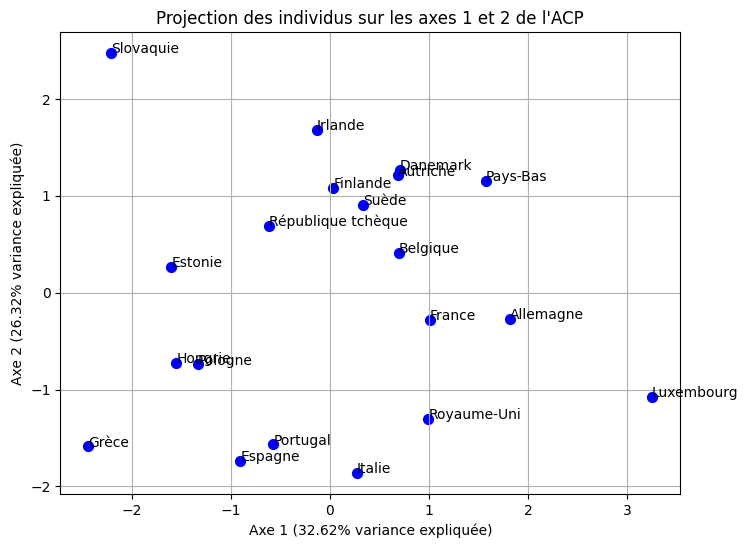

In [24]:
components = pca.fit_transform(df_scaled.select_dtypes(include=['float']))

# Points display on 2-first components
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c='blue', s=50)

# Adding name on points
for i, country in enumerate(df_scaled.index):
    plt.text(components[i, 0], components[i, 1], country)

plt.title('Projection des individus sur les axes 1 et 2 de l\'ACP')
plt.xlabel(f'Axe 1 ({explained_variance[0]*100:.2f}% variance expliquée)')
plt.ylabel(f'Axe 2 ({explained_variance[1]*100:.2f}% variance expliquée)')
plt.grid(True)

# Plot display
plt.show()